# Setup

## Installs

In [ ]:
!pip install 'aif360[LFR]'

     |████████████████████████████████| 175 kB 5.2 MB/s 
     |████████████████████████████████| 564 kB 31.2 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=7d9aed589b0c6e11b93c7b9bd0f57c1d1d9445bae669dac2faa0e5f05c72633f
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [ ]:
pip install fairlearn

     |████████████████████████████████| 177 kB 5.1 MB/s 


## Downloading dataset

Download either the Adult Census Income dataset, or the German Credit Score dataset (not both at the same time), by executing the corresponding cells below.

IMPORTANT: to check the code, I would recommend using the German Credit data-set. This is faster, and depending on your setup, you may run out of RAM with the Adult Census dataset.

### Adult Census Income

In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2022-02-16 10:19:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  3.18MB/s    in 1.2s    

2022-02-16 10:19:58 (3.18 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-02-16 10:19:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-

### German Credit Score

In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/german

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/german


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget	https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc

--2022-02-16 10:57:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘german.data’

german.data         100%[===================>]  77.92K  --.-KB/s    in 0.1s    

2022-02-16 10:57:18 (595 KB/s) - ‘german.data’ saved [79793/79793]

--2022-02-16 10:57:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4679 (4.6K) [application/x-httpd-php]
Saving to: ‘german.doc’

german.doc          100%[===================>]   4.57K  --.-KB/s    in 0s  

## Imports

In [ ]:
# Import libraries

import numpy as np
from numpy.random import default_rng
from aif360.datasets import AdultDataset, CompasDataset, GermanDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult, load_preproc_data_compas, load_preproc_data_german
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
import pdb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import *
from sklearn.metrics import accuracy_score
from copy import deepcopy
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rc('font', size=12) 
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
from google.colab import files

# np.random.seed(0)

## Setting up privileged group

Depending on chosen dataset, execute the corresponding cell (not both)

In [ ]:
# Set priviledged group for Adult Dataset
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
# Load Adult Dataset
dataset_orig = load_preproc_data_adult(['sex'])

In [ ]:
# Set priviledged group for German Dataset
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
# Load German Dataset
dataset_orig = load_preproc_data_german(['age'])

## Splitting the dataset into train and test

In [ ]:
# Split dataset into training and test set
train, test = dataset_orig.split([0.7], shuffle=True)
print("training data size", train.features.shape)
print("dataset feature names", train.feature_names)
print(train.label_names)

training data size (700, 11)
dataset feature names ['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']
['credit']


## Load helper functions

In [ ]:
def k_fold_split(num_folds, num_examples, random_generator=default_rng()):
    """ Generate list of num_folds indicating examples for each fold

    Args:
        num_folds: number of folds
        num_examples: number of examples per split
        random_generator: random number generator

    Returns:
        indices_per_fold: list of length num_folds. Each element of the list
        represents a fold and contains an array with indices of examples 
        assigned to that fold.
    """

    # Assign each example randomly to an index
    random_indices = random_generator.permutation(num_examples)

    # Assign each index to a fold of equal size
    indices_per_fold = np.array_split(random_indices, num_folds)

    return indices_per_fold


def get_train_val_id_per_fold(num_folds, num_examples, random_generator=default_rng()):
    """ Get train and validation indices per fold

    Args:
        num_folds: number of folds
        num_examples: number of examples per split
        random_generator: random number generator

    Returns:
        fold_id_list: list of length num_folds. Each element corresponds to a
            fold, and is a list containing two numpy arrays with train indices, 
            and dev indicess
    """

    # split the dataset into k splits
    indices_per_fold = k_fold_split(num_folds, num_examples, random_generator)

    fold_id_list = []

    for k in range(num_folds):
        # define k to be val set
        val_indices = indices_per_fold[k]

        # remainder is train set
        train_indices = np.hstack(indices_per_fold[:k] + indices_per_fold[k + 1:])

        fold_id_list.append([train_indices, val_indices])

    return fold_id_list

In [ ]:
def run_cross_validation(num_folds, data, reg_strength, privileged_groups, unprivileged_groups, rw=False):
    """
    Runs cross validation on dataset with evaluation

    Splits data into k_folds. Then for each iteration applies scaling on
    train and validation sets

    :param num_folds: number of folds
    :param data: the train dataset pre split into train/val (aif360)
    :param reg_strength: degree of regularization (lower number is more reg)
    :param rw: toggles re-weighing on and off
    :return: mean accuracy across folds
    """
    train_acc = []
    accuracies = []
    equality_of_opp = []

    # Convert aif360 dataset to numpy array

    data_features = np.asarray(data.features)
    data_labels = np.asarray(data.labels)

    num_examples = len(data_features)

    for i, (train_indices, val_indices) in enumerate(get_train_val_id_per_fold(num_folds, num_examples)):
        #print(f'------------{i}--------')
        # Join x aand y, shuffle, then split
        scaler = StandardScaler()

        # Split data into training and validation set
        x_training = scaler.fit_transform(data_features[train_indices, :])
        y_training = data_labels[train_indices, :].ravel()

        x_validation = scaler.transform(data_features[val_indices, :])
        y_validation = data_labels[val_indices, :].ravel()

        # Reweighting
        if rw is True:
          RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
          train_weights = RW.fit_transform(data.subset(train_indices))

        # Train the model
        model = LogisticRegression(solver='liblinear', random_state=1, C = reg_strength)
        
        if rw is True:
          model.fit(x_training, y_training, sample_weight=train_weights.instance_weights)
        else:
          model.fit(x_training, y_training)
        

        # NN
        # model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20, 20))
        # model.fit(x_training, y_training)
        
        # Make predictions on validation set
        val_predictions = model.predict(x_validation) 

        # Compute accuracy for fold and add to list
        accuracy = accuracy_score(y_validation, val_predictions) # if error may need to ravel predictions
        accuracies.append(accuracy)

        # # train accuracies
        train_preds = model.predict(x_training)
        train_acc.append(accuracy_score(y_training, train_preds)) # if error may need to ravel predictions


        # Compute fairness metric
        validation_aif_preds = deepcopy(data)
        validation_aif_preds = validation_aif_preds.subset(val_indices)
        validation_aif_preds.labels = val_predictions.reshape(-1,1)
        
        validation_aif = deepcopy(data)
        validation_aif = validation_aif.subset(val_indices)
        
        metric = ClassificationMetric(validation_aif, validation_aif_preds, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
        e_o_f = (metric.equal_opportunity_difference())
        equality_of_opp.append(e_o_f)

    print("train - dev acc: ", np.mean(np.array(train_acc)) - np.mean(np.array(accuracies)))
    # print(model.coef_)  # uncomment to inspect model coefficients
    return np.mean(np.array(accuracies)), np.mean(np.array(equality_of_opp))

In [ ]:
def regularization_analysis(reg_list, num_folds, data, privileged_groups, unprivileged_groups, rw=False):
  """
  Runs the cross-validation for each C value in the passed list and returns
  the list of mean accuracies and fairness scores.
  """
  accuracy_list_across_regs = []
  fairness_list_across_regs = []

  for reg in reg_list:
    mean_accuracy, mean_fairness = run_cross_validation(num_folds, data, reg, privileged_groups, unprivileged_groups, rw)
    accuracy_list_across_regs.append(mean_accuracy)
    fairness_list_across_regs.append(mean_fairness)

  return accuracy_list_across_regs, fairness_list_across_regs

In [ ]:
def get_test_performance(train_aif, test_aif, reg_strength, unprivileged_groups, privileged_groups, rw=False):
  """
  Get the accuracy and fairness score on the test set
  """
  # Re-train chosen model on whole training data
  scaler = StandardScaler()

  train_aif_copy = deepcopy(train_aif)
  test_aif_copy = deepcopy(test_aif)
  
  x_training = scaler.fit_transform(train_aif_copy.features)
  y_training = train_aif_copy.labels.ravel()

  x_test = scaler.transform(test_aif_copy.features)
  y_test = test_aif_copy.labels.ravel()

  # Reweighting
  if rw is True:
    RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    train_weights = RW.fit_transform(train_aif_copy)

  # Train the model
  model = LogisticRegression(solver='liblinear', random_state=1, C = reg_strength)
        
  if rw is True:
    model.fit(x_training, y_training, sample_weight=train_weights.instance_weights)
  else:
    model.fit(x_training, y_training)

  # Predict test set
  test_predictions = model.predict(x_test) 

  # Compute accuracy
  accuracy = (accuracy_score(y_test, test_predictions))

  # Compute fairness
  test_preds = deepcopy(test_aif_copy)
  test_preds.labels = test_predictions.reshape(-1,1)
  test_aif_copy_copy = deepcopy(test_aif_copy)
  metric = ClassificationMetric(test_aif_copy_copy, test_preds, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
  e_o_d = (metric.equal_opportunity_difference())

  return accuracy, e_o_d


In [ ]:
def fairness_accuracy_score(accuracy, e_o_d, acc_weight):
  """
  Compute the accuracy-fairness hybrid score
  """
  return acc_weight * accuracy + (1 - acc_weight) * (1 - abs(e_o_d))

In [ ]:
def draw_tradeoff(reg_list, accuracies, eods):
  """
  Draw accuracies and fairness scores for each C value
  """

  x = reg_list
  y1 = accuracies
  y2 = eods

  fig, ax1 = plt.subplots(figsize=(7, 4))

  ax2 = ax1.twinx()
  ax1.plot(x, y1, 'g-')
  ax2.plot(x, y2, 'b-')

  ax1.set_xlabel('Regularization (C)')
  ax1.set_xscale('log')
  ax1.set_ylabel('Accuracy', color='g')
  ax2.set_ylabel('Equality of opportunity', color='b')

  plt.tight_layout()

  plt.savefig("figure_ethics.png")
  files.download("figure_ethics.png") 

  plt.show()

In [ ]:
def plot_tradeoff_and_score(reg_list, accuracies, eods, scores):
  """
  Draw accuracies, fairness scores and hybrid score for each C value
  """
  host = host_subplot(111, axes_class=axisartist.Axes)
  plt.subplots_adjust(right=0.75)

  par1 = host.twinx()
  par2 = host.twinx()

  par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

  par1.axis["right"].toggle(all=True)
  par2.axis["right"].toggle(all=True)

  p1, = host.plot(reg_list, accuracies, label="Accuracy")
  p2, = par1.plot(reg_list, eods, label="Equality of Opportunity")
  p3, = par2.plot(reg_list, scores, label="Scores", linestyle='dashed', linewidth=1)

  host.set_xlabel("Regularization (C)")
  host.set_xscale('log')
  host.set_ylabel("Accuracy")
  par1.set_ylabel("Equality of Oppoortunity")
  par2.set_ylabel("Scores")

  host.axis["left"].label.set_color(p1.get_color())
  par1.axis["right"].label.set_color(p2.get_color())
  par2.axis["right"].label.set_color(p3.get_color())

  plt.tight_layout()
  plt.savefig("figure_ethics.png")
  files.download("figure_ethics.png") 
  plt.show()

In [ ]:
# Set-up list of C values to check (regularization parameters)
reg_list = [0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

## Task 1

In [ ]:
# Run cross-validation analysis for each C
acc_task_1, eod_task_1 = regularization_analysis(reg_list, 5, dataset_orig, privileged_groups, unprivileged_groups)

train - dev acc:  0.00725000000000009
train - dev acc:  0.019000000000000128
train - dev acc:  -0.003250000000000086
train - dev acc:  -0.0010000000000000009
train - dev acc:  0.002749999999999919
train - dev acc:  0.005999999999999894
train - dev acc:  0.01100000000000001
train - dev acc:  -0.0014999999999998348
train - dev acc:  0.015499999999999958
train - dev acc:  0.005750000000000033
train - dev acc:  0.01200000000000001
train - dev acc:  0.003249999999999975
train - dev acc:  0.012750000000000039
train - dev acc:  0.004249999999999976
train - dev acc:  0.012749999999999928


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

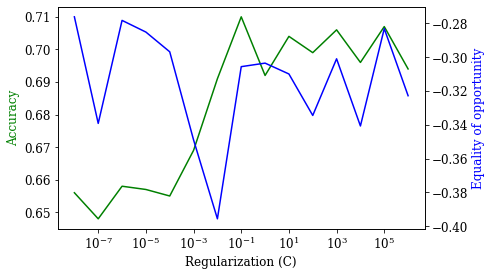

In [ ]:
# Visualise the trade-off
draw_tradeoff(reg_list, acc_task_1, eod_task_1)

In [ ]:
# Retrieve best model for accuracy and fairness
best_acc_index_task_1 = np.array(acc_task_1).argmax()
best_eod_index_task_1 = np.argmin(np.abs(eod_task_1))
print(reg_list[best_acc_index_task_1])
print(reg_list[best_eod_index_task_1])

0.1
1e-08


In [ ]:
# Test performance accuracy based selected model:
get_test_performance(train, test, reg_list[best_acc_index_task_1], unprivileged_groups, privileged_groups, rw=False)

(0.7133333333333334, -0.1515151515151515)

In [ ]:
# Test performance fairness based selected model:
get_test_performance(train, test, reg_list[best_eod_index_task_1], unprivileged_groups, privileged_groups, rw=False)

(0.6466666666666666, -0.4015151515151515)

## Task 2

In [ ]:
# Run cross-validation analysis for each C, with re-weighing
acc_task_2, eod_task_2 = regularization_analysis(reg_list, 5, dataset_orig, privileged_groups, unprivileged_groups, rw=True)

train - dev acc:  0.00275000000000003
train - dev acc:  0.011749999999999927
train - dev acc:  0.0034999999999998366
train - dev acc:  0.007000000000000006
train - dev acc:  0.011749999999999816
train - dev acc:  0.015750000000000042
train - dev acc:  0.0014999999999998348
train - dev acc:  0.003750000000000031
train - dev acc:  0.0022500000000000853
train - dev acc:  0.013000000000000012
train - dev acc:  0.002749999999999919
train - dev acc:  0.004250000000000087
train - dev acc:  0.003750000000000031
train - dev acc:  0.005499999999999949
train - dev acc:  0.004250000000000087


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

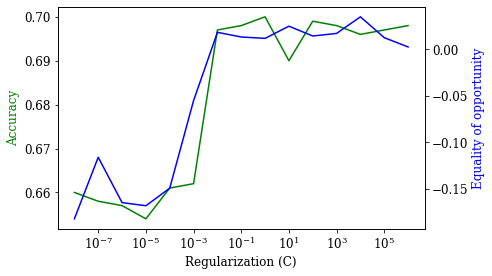

In [ ]:
# Visualise the trade-off
draw_tradeoff(reg_list, acc_task_2, eod_task_2)

In [ ]:
# Retrieve best model for accuracy and fairness
best_acc_index_task_2 = np.array(acc_task_2).argmax()
best_eod_index_task_2 = np.argmin(np.abs(eod_task_2))
print(reg_list[best_acc_index_task_2])
print(reg_list[best_eod_index_task_2])

1
1000000


In [ ]:
# Test performance accuracy based selection:
get_test_performance(train, test, reg_list[best_acc_index_task_2], unprivileged_groups, privileged_groups, rw=True)

(0.6966666666666667, 0.0)

In [ ]:
# Test performance eod based selection:
get_test_performance(train, test, reg_list[best_eod_index_task_2], unprivileged_groups, privileged_groups, rw=True)

(0.6966666666666667, 0.0)

Note, that with re-weighing, and depending on the data split, we often find that performance on the test set for the best accuracy based and best fairness based model are the same, even if their C-values differ slightly.

## Task 3

### Standard model

In [ ]:
# Run cross-validation analysis for each C, no re-weighing
acc_task_3_standard, eod_task_3_standard = regularization_analysis(reg_list, 5, dataset_orig, privileged_groups, unprivileged_groups)

train - dev acc:  0.00275000000000003
train - dev acc:  -0.0004999999999999449
train - dev acc:  0.016750000000000043
train - dev acc:  0.0022499999999999742
train - dev acc:  0.0034999999999999476
train - dev acc:  0.011499999999999955
train - dev acc:  0.0045000000000000595
train - dev acc:  0.018999999999999906
train - dev acc:  0.01749999999999996
train - dev acc:  0.006000000000000116
train - dev acc:  0.022499999999999964
train - dev acc:  0.007999999999999896
train - dev acc:  0.0024999999999999467
train - dev acc:  0.0030000000000000027
train - dev acc:  -0.0030000000000000027


In [ ]:
# Retrieve hybrid score for each C
scores_standard = []
for i in range(len(acc_task_3_standard)):
  scores_standard.append(fairness_accuracy_score(acc_task_3_standard[i], eod_task_3_standard[i], 0.5))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

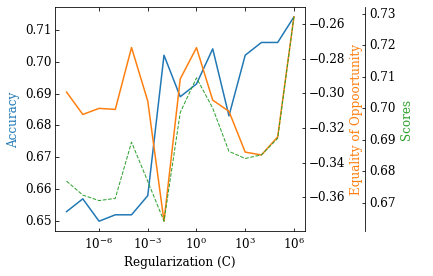

In [ ]:
# Visualise the trade-off and score
plot_tradeoff_and_score(reg_list, acc_task_3_standard, eod_task_3_standard, scores_standard)

In [ ]:
# Retrieve the best model based on hybrid score and the score
best_standard_model_index = np.array(scores_standard).argmax()
print(reg_list[best_standard_model_index])
print(np.array(scores_standard).max())

1000000
0.7290695970695971


In [ ]:
# Test set performance (standard model)
get_test_performance(train, test, reg_list[best_standard_model_index], unprivileged_groups, privileged_groups, rw=False)

(0.7133333333333334, -0.1515151515151515)

### Fairness model

In [ ]:
# Run cross-validation analysis for each C, with re-weighing
acc_task_3_fairness, eod_task_3_fairness = regularization_analysis(reg_list, 5, dataset_orig, privileged_groups, unprivileged_groups, rw=True)

train - dev acc:  0.004750000000000143
train - dev acc:  0.006000000000000005
train - dev acc:  0.010000000000000009
train - dev acc:  0.005249999999999977
train - dev acc:  0.0129999999999999
train - dev acc:  0.01550000000000007
train - dev acc:  0.0045000000000000595
train - dev acc:  0.00024999999999986144
train - dev acc:  0.010499999999999954
train - dev acc:  0.004249999999999865
train - dev acc:  0.013250000000000206
train - dev acc:  0.008000000000000118
train - dev acc:  0.005750000000000033
train - dev acc:  0.005249999999999977
train - dev acc:  0.000500000000000056


In [ ]:
# Retrieve hybrid score for each C
scores_fairness = []
for i in range(len(acc_task_3_fairness)):
  scores_fairness.append(fairness_accuracy_score(acc_task_3_fairness[i], eod_task_3_fairness[i], 0.5))

In [ ]:
# Retrieve the best model based on hybrid score and the score
best_fairness_model_index = np.array(scores_fairness).argmax()
print(reg_list[best_fairness_model_index])
print(np.array(scores_fairness).max())

10
0.8469344798896219


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

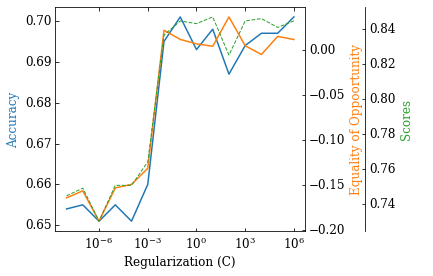

In [ ]:
# Visualise the trade-off and hybrid score
plot_tradeoff_and_score(reg_list, acc_task_3_fairness, eod_task_3_fairness, scores_fairness)

In [ ]:
# Test set performance (fairness re-weighed model)
get_test_performance(train, test, reg_list[best_fairness_model_index], unprivileged_groups, privileged_groups, rw=True)

(0.6966666666666667, 0.0)

## Extension

### Re-define functions to allow for dropping sensitive feature

In [ ]:
def run_cross_validation_del(num_folds, data, reg_strength, privileged_groups, unprivileged_groups, rw=False, del_index=1):
    """
    Runs cross validation on dataset with evaluation

    Splits data into k_folds. Then for each iteration applies scaling on
    train and validation sets

    :param num_folds: number of folds
    :param data: the train dataset pre split into train/val (aif360)
    :param reg_strength: degree of regularization (lower number is more reg)
    :param del_index: column index of sensitive feature to drop
    :return: mean accuracy across folds
    """
    accuracies = []
    equality_of_opp = []

    # Convert aif360 dataset to numpy array

    data_features = np.asarray(data.features)
    data_labels = np.asarray(data.labels)

    num_examples = len(data_features)

    for i, (train_indices, val_indices) in enumerate(get_train_val_id_per_fold(num_folds, num_examples)):
        #print(f'------------{i}--------')
        # Join x aand y, shuffle, then split
        scaler = StandardScaler()

        # Split data into training and validation set
        x_training = scaler.fit_transform(data_features[train_indices, :])
        x_training_del = np.delete(x_training, del_index, 1) # drops the sensitive feature
        y_training = data_labels[train_indices, :].ravel()

        x_validation = scaler.transform(data_features[val_indices, :])
        x_validation_del = np.delete(x_validation, del_index, 1) # drops the sensitive feature
        y_validation = data_labels[val_indices, :].ravel()

        # Reweighting
        if rw is True:
          RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
          train_weights = RW.fit_transform(data.subset(train_indices))

        # Train the model
        model = LogisticRegression(solver='liblinear', random_state=1, C = reg_strength)
        
        if rw is True:
          model.fit(x_training_del, y_training, sample_weight=train_weights.instance_weights)
        else:
          model.fit(x_training_del, y_training)
        
        # Make predictions on validation set
        val_predictions = model.predict(x_validation_del) 

        # Compute accuracy for fold and add to list
        accuracy = accuracy_score(y_validation, val_predictions)
        accuracies.append(accuracy)

        # # train accuracies
        train_preds = model.predict(x_training_del)
        #print(accuracy_score(y_training, train_preds))


        # Compute fairness metric
        validation_aif_preds = deepcopy(data)
        validation_aif_preds = validation_aif_preds.subset(val_indices)
        validation_aif_preds.labels = val_predictions.reshape(-1,1)
        
        validation_aif = deepcopy(data)
        validation_aif = validation_aif.subset(val_indices)
        
        metric = ClassificationMetric(validation_aif, validation_aif_preds, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
        e_o_f = (metric.equal_opportunity_difference())
        equality_of_opp.append(e_o_f)

    return np.mean(np.array(accuracies)), np.mean(np.array(equality_of_opp))

In [ ]:
def regularization_analysis_del(reg_list, num_folds, data, privileged_groups, unprivileged_groups, rw=False, del_index=1):
  accuracy_list_across_regs = []
  fairness_list_across_regs = []

  for reg in reg_list:
    mean_accuracy, mean_fairness = run_cross_validation_del(num_folds, data, reg, privileged_groups, unprivileged_groups, rw, del_index)
    accuracy_list_across_regs.append(mean_accuracy)
    fairness_list_across_regs.append(mean_fairness)

  return accuracy_list_across_regs, fairness_list_across_regs

In [ ]:
def get_test_performance_del(train_aif, test_aif, reg_strength, unprivileged_groups, privileged_groups, rw=False, del_index=1):
  # Re-train chosen model on whole training data
  scaler = StandardScaler()

  train_aif_copy = deepcopy(train_aif)
  test_aif_copy = deepcopy(test_aif)
  
  x_training = scaler.fit_transform(train_aif_copy.features)
  x_training_del = np.delete(x_training, del_index, 1)
  y_training = train_aif_copy.labels.ravel()

  x_test = scaler.transform(test_aif_copy.features)
  x_test_del = np.delete(x_test, del_index, 1)
  y_test = test_aif_copy.labels.ravel()

  # Reweighting
  if rw is True:
    RW = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    train_weights = RW.fit_transform(train_aif_copy)

  # Train the model
  model = LogisticRegression(solver='liblinear', random_state=1, C = reg_strength)
        
  if rw is True:
    model.fit(x_training_del, y_training, sample_weight=train_weights.instance_weights)
  else:
    model.fit(x_training_del, y_training)

  # Predict test set
  test_predictions = model.predict(x_test_del) 

  # Compute accuracy
  accuracy = (accuracy_score(y_test, test_predictions))

  # Compute fairness
  test_preds = deepcopy(test_aif_copy)
  test_preds.labels = test_predictions.reshape(-1,1)
  test_aif_copy_copy = deepcopy(test_aif_copy)
  metric = ClassificationMetric(test_aif_copy_copy, test_preds, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
  e_o_d = (metric.equal_opportunity_difference())

  return accuracy, e_o_d

### Set index column to be deleted (depends on dataset)

In [ ]:
# For Adult Census choose del_index = 1, for German Credit del_index = 0
del_index = 0

### Models 1 and 2 (standard)

In [ ]:
acc_task_1, eod_task_1 = regularization_analysis_del(reg_list, 5, dataset_orig, privileged_groups, unprivileged_groups, rw=False, del_index=del_index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

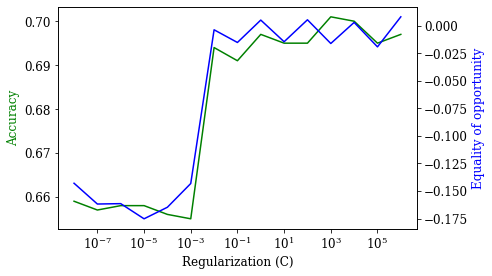

In [ ]:
draw_tradeoff(reg_list, acc_task_1, eod_task_1)

In [ ]:
best_acc_index_task_1 = np.array(acc_task_1).argmax()
best_eod_index_task_1 = np.argmin(np.abs(eod_task_1))
print(reg_list[best_acc_index_task_1])
print(reg_list[best_eod_index_task_1])

1000
10000


In [ ]:
# Test performance accuracy based selection:
get_test_performance_del(train, test, reg_list[best_acc_index_task_1], unprivileged_groups, privileged_groups, rw=False, del_index=del_index)

(0.6966666666666667, 0.0)

In [ ]:
# Test performance eod based selection:
get_test_performance_del(train, test, reg_list[best_eod_index_task_1], unprivileged_groups, privileged_groups, rw=False, del_index=del_index)

(0.6966666666666667, 0.0)

### Models 3 and 4 (re-weighted)

In [ ]:
acc_task_2, eod_task_2 = regularization_analysis_del(reg_list, 5, dataset_orig, privileged_groups, unprivileged_groups, rw=True, del_index=del_index)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

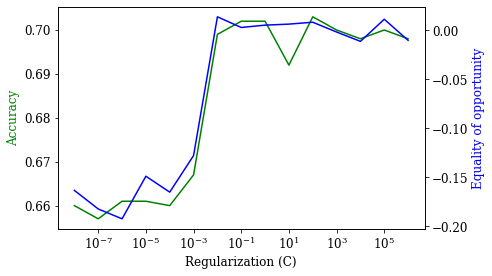

In [ ]:
draw_tradeoff(reg_list, acc_task_2, eod_task_2)

In [ ]:
best_acc_index_task_2 = np.array(acc_task_2).argmax()
best_eod_index_task_2 = np.argmin(np.abs(eod_task_2))
print(reg_list[best_acc_index_task_2])
print(reg_list[best_eod_index_task_2])

100
1000


In [ ]:
# Test performance accuracy based selection:
get_test_performance_del(train, test, reg_list[best_acc_index_task_2], unprivileged_groups, privileged_groups, rw=True, del_index=del_index)

(0.6966666666666667, 0.0)

In [ ]:
# Test performance eod based selection:
get_test_performance_del(train, test, reg_list[best_eod_index_task_2], unprivileged_groups, privileged_groups, rw=True, del_index=del_index)

(0.6966666666666667, 0.0)

### Models 5 and 6 (score based selection)

In [ ]:
acc_task_3_standard, eod_task_3_standard = regularization_analysis_del(reg_list, 5, dataset_orig, privileged_groups, unprivileged_groups, rw=False, del_index=del_index)

In [ ]:
scores_standard = []
for i in range(len(acc_task_3_standard)):
  scores_standard.append(fairness_accuracy_score(acc_task_3_standard[i], eod_task_3_standard[i], 0.5))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

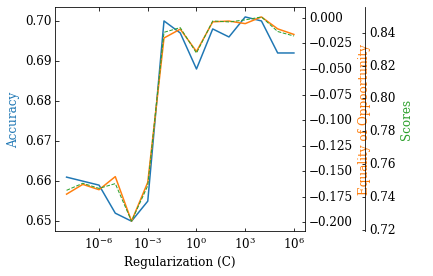

In [ ]:
plot_tradeoff_and_score(reg_list, acc_task_3_standard, eod_task_3_standard, scores_standard)

In [ ]:
best_standard_model_index = np.array(scores_standard).argmax()
print(reg_list[best_standard_model_index])
print(np.array(scores_standard).max())

10000
0.8495099627303018


In [ ]:
# Test set performance (standard model)
get_test_performance_del(train, test, reg_list[best_standard_model_index], unprivileged_groups, privileged_groups, rw=False, del_index=del_index)

(0.6966666666666667, 0.0)

In [ ]:
acc_task_3_fairness, eod_task_3_fairness = regularization_analysis_del(reg_list, 5, dataset_orig, privileged_groups, unprivileged_groups, rw=True, del_index=del_index)

In [ ]:
scores_fairness = []
for i in range(len(acc_task_3_fairness)):
  scores_fairness.append(fairness_accuracy_score(acc_task_3_fairness[i], eod_task_3_fairness[i], 0.5))

In [ ]:
best_fairness_model_index = np.array(scores_fairness).argmax()
print(reg_list[best_fairness_model_index])
print(np.array(scores_fairness).max())

0.01
0.8484787188508085


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

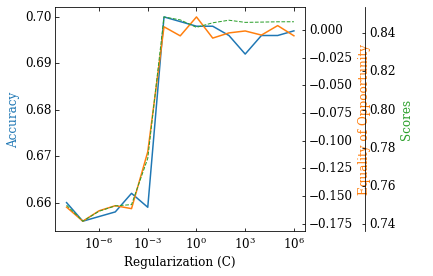

In [ ]:
plot_tradeoff_and_score(reg_list, acc_task_3_fairness, eod_task_3_fairness, scores_fairness)

In [ ]:
# Test set performance (fairness model)
get_test_performance_del(train, test, reg_list[best_fairness_model_index], unprivileged_groups, privileged_groups, rw=True, del_index=del_index)

(0.6966666666666667, 0.0)